## Model training

### Set up/check environment

In [40]:
# check python environment
!conda info
# active environment should be WM_ML


     active environment : WM_ML
    active env location : /opt/anaconda3/envs/WM_ML
            shell level : 1
       user config file : /Users/jilliancheck/.condarc
 populated config files : /Users/jilliancheck/.condarc
          conda version : 24.11.3
    conda-build version : 24.5.1
         python version : 3.12.4.final.0
                 solver : libmamba (default)
       virtual packages : __archspec=1=m1
                          __conda=24.11.3=0
                          __osx=15.0=0
                          __unix=0=0
       base environment : /opt/anaconda3  (writable)
      conda av data dir : /opt/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/osx-arm64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/osx-arm64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /opt/anaconda3/pkgs
     

In [41]:
import numpy as np
from numpy import mean, round
import pandas as pd
import pydot
import graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score

# set the number of maximum displayed rows for printed dataframes to 1000
pd.set_option('display.max_rows', 5000)

### CSV load in

#### Current data set - RTMA + LOCOMOS - irri/pcp 21 and 22


In [42]:
# For PCA data!!!!
x_train = pd.read_csv('/Users/jilliancheck/OneDrive - Michigan State University/Documents/Work/White mold/Modeling/jupyter notebooks/!Finalizing - 2024/Stratified data sets/x_train_LX_PCA.csv')
y_train = pd.read_csv('/Users/jilliancheck/OneDrive - Michigan State University/Documents/Work/White mold/Modeling/jupyter notebooks/!Finalizing - 2024/Stratified data sets/y_train_LX_PCA.csv')
x_test = pd.read_csv('/Users/jilliancheck/OneDrive - Michigan State University/Documents/Work/White mold/Modeling/jupyter notebooks/!Finalizing - 2024/Stratified data sets/x_test_LX_PCA.csv')
y_test = pd.read_csv('/Users/jilliancheck/OneDrive - Michigan State University/Documents/Work/White mold/Modeling/jupyter notebooks/!Finalizing - 2024/Stratified data sets/y_test_LX_PCA.csv')

In [43]:
# Check data sets and their lengths
# Check data sets and their lengths
print('x training data, n =', len(x_train))
print('y training data, n =', len(y_train))
print('x test data, n =', len(x_test))
print('y test data, n =', len(y_test))
display(x_train)
display(y_train)
display(x_test)
display(y_test)

x training data, n = 117
y training data, n = 117
x test data, n = 30
y test data, n = 30


soil type  principal component 1  principal component 2  \
0            1              -0.384066               0.044797   
1            1              -0.680618               0.861676   
2            1               0.296542              -0.329762   
3            1              -0.600036              -0.025649   
4            1              -0.404105               0.095483   
5            2               0.725873               0.016223   
6            2               0.560149              -0.215569   
7            2               0.719320              -0.336233   
8            1              -0.142434              -0.299440   
9            1               0.200744              -0.113863   
10           1               0.451722              -0.036238   
11           1               0.378171              -0.021687   
12           2               0.790786              -0.166870   
13           1              -0.778344              -0.266941   
14           1              -0.022733              -0.281751   
15           1               0.146966              -0.839960   
16           1               0.340537              -0.040167   
17           1              -0.788589               0.446672   
18           1              -0.498665              -0.134864   
19           0               0.240147               0.043094   
20           1               0.321557               0.372173   
21           2               0.190486              -0.122729   
22           1               0.123096              -0.023883   
23           1              -0.735469              -0.249852   
24           1               0.136263              -0.709667   
25           0               0.128149              -0.133270   
26           0               0.222467               0.091047   
27           2               0.732598               0.056932   
28           1               0.029860              -0.185999   
29           1               0.906127               0.460309   
30           1              -0.618415              -0.239862   
31           1              -0.161942              -0.260596   
32           1              -0.504805              -0.148329   
33           1              -0.870221               0.057388   
34           1              -0.707852              -0.197989   
35           0               0.225898              -0.193845   
36           1               0.225028              -0.428482   
37           1              -0.223060               0.204207   
38           2              -0.000575              -0.240522   
39           1               0.326900               0.300160   
40           1               0.039529              -0.097966   
41           1              -0.159207              -0.336224   
42           1               0.021165              -0.138240   
43           1               0.082879               0.471094   
44           1              -0.300154              -0.234047   
45           2               0.058286               0.355771   
46           2              -0.538729               1.042935   
47           1              -0.789719               0.416676   
48           2              -0.106468              -0.112883   
49           1              -0.321088              -0.037738   
50           0              -0.293732               0.752909   
51           2               0.312184               0.004629   
52           1               0.208263              -0.465250   
53           1              -0.571753              -0.022477   
54           1               0.910533               0.775955   
55           1              -0.669072               0.880987   
56           1               0.127626              -0.598351   
57           1              -0.304041              -0.364969   
58           1              -0.560443              -0.023483   
59           1              -0.277037               0.117825   
60           1               0.350292              -0.198861   
61           0               0.694290

target
0         0
1         0
2         1
3         0
4         0
5         0
6         0
7         0
8         0
9         1
10        1
11        1
12        0
13        1
14        1
15        0
16        0
17        1
18        1
19        0
20        0
21        1
22        0
23        1
24        1
25        0
26        0
27        0
28        1
29        0
30        1
31        1
32        0
33        1
34        1
35        1
36        1
37        0
38        0
39        0
40        1
41        0
42        1
43        1
44        1
45        1
46        0
47        1
48        0
49        1
50        1
51        1
52        1
53        0
54        0
55        0
56        1
57        1
58        1
59        0
60        1
61        0
62        1
63        1
64        1
65        1
66        0
67        1
68        1
69        0
70        1
71        0
72        1
73        1
74        1
75        0
76        1
77        0
78        0
79        1
80        1
81        1
82        0
83        1
84        0
85        1
86        1
87        0
88        1
89        1
90        0
91        1
92        1
93        0
94        1
95        1
96        1
97        0
98        0
99        0
100       0
101       0
102       0
103       1
104       0
105       1
106       1
107       0
108       1
109       1
110       1
111       1
112       1
113       0
114       1
115       0
116       1

soil type  principal component 1  principal component 2  \
0           1               0.153376              -0.208391   
1           1              -0.275675              -0.370726   
2           0              -0.096036               0.038593   
3           0              -0.224762              -0.029889   
4           1              -0.132663               0.123258   
5           2              -0.548722               0.702212   
6           1              -0.762938              -0.233155   
7           1               0.330053               0.088347   
8           1              -0.480274              -0.267076   
9           2               0.702500              -0.258921   
10          1               0.851275               0.591179   
11          1              -0.229292               0.117374   
12          1               0.148736               0.695317   
13          1              -0.082115               0.087438   
14          2              -0.284932              -0.293576   
15          1               0.707464               0.053574   
16          1              -0.065269              -0.169999   
17          1               0.861052               0.409733   
18          1               0.644649               0.078109   
19          1              -0.815887               0.653563   
20          1              -0.825185               0.636531   
21          1              -0.049349              -0.135087   
22          2               0.583002              -0.457487   
23          1               0.887794               0.317061   
24          1              -0.398009               0.048415   
25          1              -0.263037              -0.388197   
26          2               0.326946              -0.292765   
27          0               0.183485              -0.006649   
28          2              -0.422030              -0.124921   
29          1               0.974990               0.360613   

    principal component 3  principal component 4  principal component 5  \
0                0.172559               0.150255               0.194543   
1                0.051088              -0.324176               0.194365   
2                0.429165              -0.193903               0.066269   
3                0.433466              -0.235347              -0.123793   
4                0.306972              -0.011253              -0.113733   
5                0.309243              -0.229459              -0.090823   
6               -0.392010               0.183394              -0.065861   
7                0.128628              -0.187635              -0.364406   
8                0.067693              -0.057531               0.136015   
9               -0.310862               0.145518               0.216841   
10              -0.352899              -0.089363              -0.035237   
11              -0.374584               0.356835              -0.158148   
12               0.200821              -0.393246              -0.307931   
13              -0.334403               0.216519              -0.135813   
14              -0.276130               0.105378              -0.117745   
15              -0.061985               0.271327              -0.000761   
16               0.288088               0.186923               0.072670   
17               0.183443               0.252433               0.171745   
18               0.325259               0.312588               0.172578   
19              -0.274336              -0.366844               0.189091   
20              -0.198228              -0.353811               0.233157   
21               0.066905               0.115148              -0.038761   
22              -0.462342              -0.121519               0.314493   
23               0.158724               0.319447               0.263454   
24               0.359155               0.653369              -0.022197   
25               0.137186              -0.279103               0.248728   
26              -0.245377

target
0        1
1        1
2        1
3        1
4        0
5        1
6        1
7        1
8        1
9        0
10       0
11       0
12       1
13       0
14       0
15       1
16       1
17       1
18       1
19       0
20       0
21       1
22       0
23       1
24       1
25       1
26       0
27       0
28       0
29       0

In [44]:
# Define cross validation scheme
cv=StratifiedShuffleSplit(n_splits=5, test_size=0.20, random_state=42)

## Alg 1: Binomial Logistic Regression
### Using with stepwise selection comparison and k_features optimization with mlxtend, and not using CV grid search
* Resource: https://rasbt.github.io/mlxtend/#examples

In [29]:
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix

### Stepwise selection method and feature selection

In [30]:
# Comparing selection methods (forwards vs backwards, floating vs not) and optimizing the number of features included

lr = linear_model.LogisticRegression(random_state=42)

# Sequential Forward Selection
sfs = SequentialFeatureSelector(lr,
          k_features=(1,6), 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=cv,
          n_jobs=-1)
sfs = sfs.fit(x_train, y_train.values.ravel())

print('\nSequential Forward Selection:')
print(len(sfs.k_feature_idx_), 'features;', sfs.k_feature_names_)
print('CV Score:')
print(sfs.k_score_)
###################################################

# Sequential Backward Selection
sbs = SequentialFeatureSelector(lr,
          k_features=(1,6), 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=cv,
          n_jobs=-1)
sbs = sbs.fit(x_train, y_train.values.ravel())

print('\nSequential Backward Selection:')
print(len(sbs.k_feature_idx_), 'features;', sbs.k_feature_names_)
print('CV Score:')
print(sbs.k_score_)

###################################################

# Sequential Forward Floating Selection
sffs = SequentialFeatureSelector(lr,
           k_features=(1,6), 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=cv,
           n_jobs=-1)
sffs = sffs.fit(x_train, y_train.values.ravel())

print('\nSequential Forward Floating Selection:')
print(len(sffs.k_feature_idx_), 'features;', sffs.k_feature_names_)
print('CV Score:')
print(sffs.k_score_)

###################################################

# Sequential Backward Floating Selection
sbfs = SequentialFeatureSelector(lr,
           k_features=(1,6), 
           forward=False, 
           floating=True, 
           scoring='accuracy',
           cv=cv,
           n_jobs=-1)
sbfs = sbfs.fit(x_train, y_train.values.ravel())

print('\nSequential Backward Floating Selection:')
print(len(sbfs.k_feature_idx_), 'features;', sbfs.k_feature_names_)
print('CV Score:')
print(sbfs.k_score_)


Sequential Forward Selection:
6 features; ('soil type', 'principal component 1', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6')
CV Score:
0.7333333333333334


/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selecti


Sequential Backward Selection:
4 features; ('principal component 3', 'principal component 4', 'principal component 5', 'principal component 6')
CV Score:
0.75


/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selecti


Sequential Forward Floating Selection:
4 features; ('principal component 3', 'principal component 4', 'principal component 5', 'principal component 6')
CV Score:
0.75


/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selecti


Sequential Backward Floating Selection:
4 features; ('principal component 3', 'principal component 4', 'principal component 5', 'principal component 6')
CV Score:
0.75


/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selecti

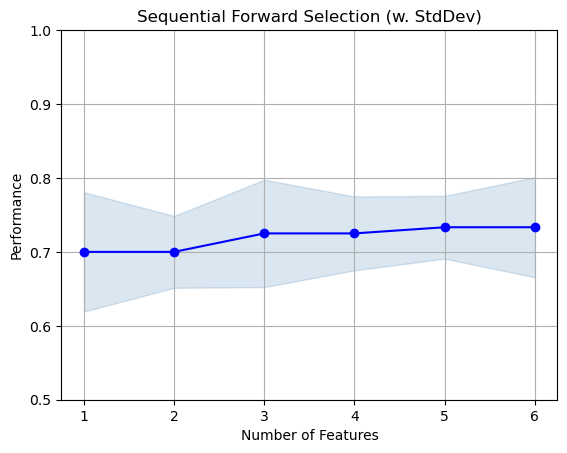

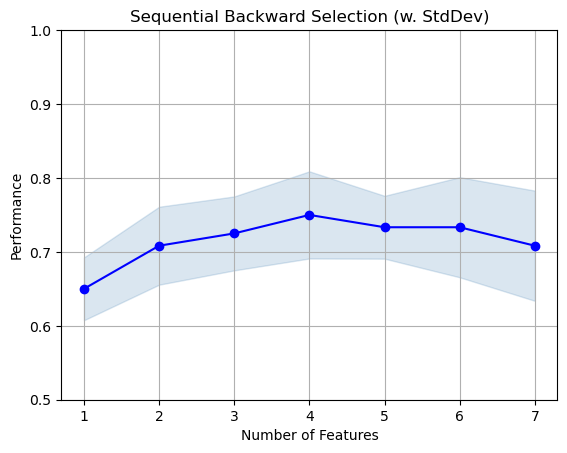

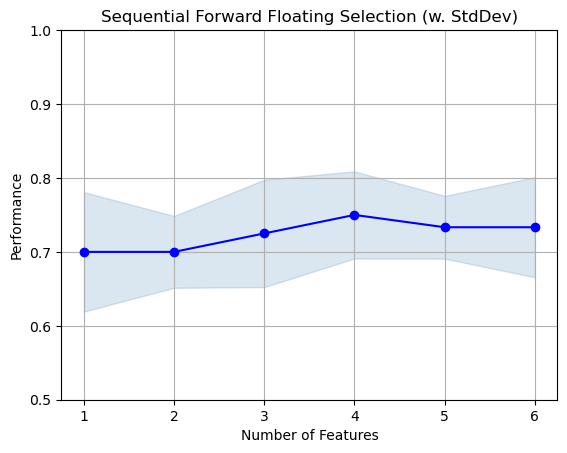

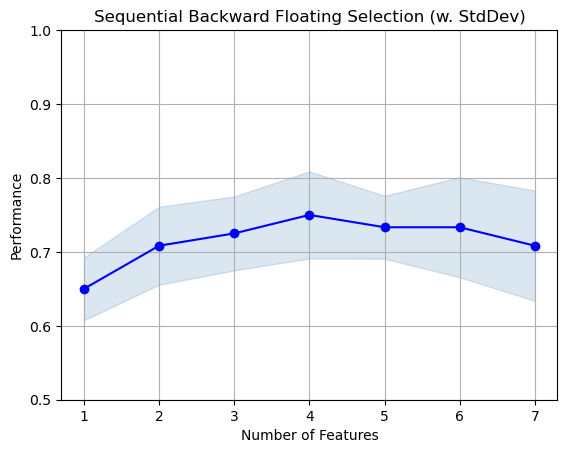

In [31]:
# Plot results 

fig_sfs = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

fig_sbs = plot_sfs(sbs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

fig_sffs = plot_sfs(sffs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Forward Floating Selection (w. StdDev)')
plt.grid()
plt.show()

fig_sbfs = plot_sfs(sbfs.get_metric_dict(), kind='std_dev')
plt.ylim([0.5, 1])
plt.title('Sequential Backward Floating Selection (w. StdDev)')
plt.grid()
plt.show()

In [32]:
# Create a dataframe with only the selected features
selected_columns = list(map(str,sbs.k_feature_names_))
x_train_selected = x_train[selected_columns]
x_test_selected = x_test[selected_columns]

### Hyper parameter grid search

In [18]:
# define parent construction
lr = linear_model.LogisticRegression(random_state=42)

# algorithm to use in optimization
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky']
# penalty technique
    # NOTE: not all solvers and penalties are compatable, so expect errors outputted during grid search
penalty = ['l1', 'l2', 'elasticnet']
# penalty strength
C = np.logspace(0, 5, 6) 
# not considering tolerance, default is 1e-4 which is fine
    
# define parameter dictionary
param_dict = {
    'solver': solver,                   
    'penalty': penalty, 
    'C': C
}

# all parameters included

In [34]:
# execute grid search
grid = GridSearchCV(estimator = lr,
                    param_grid = param_dict, # mapping parameter dictionary defined earlier
                    cv = cv,
                    verbose = 3 # option 3 outputs scores for each test
                   )
grid.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.583 total time=   0.0s
[CV 2/5] END C=1.0, penalty=l1, solver=liblin

/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
300 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/linear_mod

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga', 'newton-cholesky']},
             verbose=3)

In [35]:
# organize grid search results for further exploration
lr_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(lr_grid_results)

C     penalty           solver  Accuracy
20       10.0          l1        liblinear  0.716667
40      100.0          l1             saga  0.716667
38      100.0          l1        liblinear  0.716667
56     1000.0          l1        liblinear  0.708333
80    10000.0          l2        liblinear  0.708333
62     1000.0          l2        liblinear  0.708333
63     1000.0          l2              sag  0.708333
64     1000.0          l2             saga  0.708333
65     1000.0          l2  newton-cholesky  0.708333
74    10000.0          l1        liblinear  0.708333
76    10000.0          l1             saga  0.708333
78    10000.0          l2        newton-cg  0.708333
79    10000.0          l2            lbfgs  0.708333
81    10000.0          l2              sag  0.708333
60     1000.0          l2        newton-cg  0.708333
82    10000.0          l2             saga  0.708333
83    10000.0          l2  newton-cholesky  0.708333
92   100000.0          l1        liblinear  0.708333
94   100000.0          l1             saga  0.708333
96   100000.0          l2        newton-cg  0.708333
97   100000.0          l2            lbfgs  0.708333
98   100000.0          l2        liblinear  0.708333
99   100000.0          l2              sag  0.708333
100  100000.0          l2             saga  0.708333
61     1000.0          l2            lbfgs  0.708333
101  100000.0          l2  newton-cholesky  0.708333
58     1000.0          l1             saga  0.708333
44      100.0          l2        liblinear  0.708333
42      100.0          l2        newton-cg  0.708333
43      100.0          l2            lbfgs  0.708333
26       10.0          l2        liblinear  0.708333
45      100.0          l2              sag  0.708333
47      100.0          l2  newton-cholesky  0.708333
46      100.0          l2             saga  0.708333
11        1.0          l2  newton-cholesky  0.708333
6         1.0          l2        newton-cg  0.708333
7         1.0          l2            lbfgs  0.708333
8         1.0          l2        liblinear  0.708333
9         1.0          l2              sag  0.708333
10        1.0          l2             saga  0.708333
22       10.0          l1             saga  0.708333
24       10.0          l2        newton-cg  0.700000
25       10.0          l2            lbfgs  0.700000
27       10.0          l2              sag  0.700000
28       10.0          l2             saga  0.700000
29       10.0          l2  newton-cholesky  0.700000
4         1.0          l1             saga  0.675000
2         1.0          l1        liblinear  0.675000
0         1.0          l1        newton-cg       NaN
1         1.0          l1            lbfgs       NaN
3         1.0          l1              sag       NaN
5         1.0          l1  newton-cholesky       NaN
12        1.0  elasticnet        newton-cg       NaN
13        1.0  elasticnet            lbfgs       NaN
14        1.0  elasticnet        liblinear       NaN
15        1.0  elasticnet              sag       NaN
16        1.0  elasticnet             saga       NaN
17        1.0  elasticnet  newton-cholesky       NaN
18       10.0          l1        newton-cg       NaN
19       10.0          l1            lbfgs       NaN
21       10.0          l1              sag       NaN
23       10.0          l1  newton-cholesky       NaN
30       10.0  elasticnet        newton-cg       NaN
31       10.0  elasticnet            lbfgs       NaN
32       10.0  elasticnet        liblinear       NaN
33       10.0  elasticnet              sag       NaN
34       10.0  elasticnet             saga       NaN
35       10.0  elasticnet  newton-cholesky       NaN
36      100.0          l1        newton-cg       NaN
37      100.0          l1            lbfgs       NaN
39      100.0          l1              sag       NaN
41      100.0          l1  newton-cholesky       NaN
48      100.0  elasticnet        newton-cg       NaN
49      100.0  elasticnet            lbfgs       NaN
50      100.0  elasticnet        libl

### Hyper parameter and model setting

In [36]:
# indexing best parameters from GridSearchCV
hyper_lr = grid.best_params_

# print best hyperparamaters
print(hyper_lr)

# tune logistic regression model using best hyper parameters
lr_tuned = linear_model.LogisticRegression(random_state=42,
                                           solver = hyper_lr['solver'],
                                           penalty = hyper_lr['penalty'],
                                           C = hyper_lr['C'])

{'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}


### Performance estimation for training data

In [37]:
# evaluate the tuned model
lr_tuned_train_result = cross_val_score(lr_tuned,
                                    x_train_selected,
                                    y_train.values.ravel(),
                                    cv=cv)

# display the tuned model accurary as a percentage
# display the tuned model accurary as a percentage
print('Accuracy scores:', np.round(lr_tuned_train_result, 2))
print('Average accuracy on training data:', lr_tuned_train_result.mean())

Accuracy scores: [0.71 0.67 0.83 0.62 0.75]
Average accuracy on training data: 0.7166666666666667


### Evalutate model with test data

In [38]:
# using tuned model to make y test data preditinos using x test data inputs
ypred = lr_tuned.fit(x_train_selected, y_train.values.ravel()).predict(x_test_selected)
yprob = lr_tuned.fit(x_train_selected, y_train.values.ravel()).predict_proba(x_test_selected)

# assessing sensitivity/specificity/precision of tuned model on test data
cm = confusion_matrix(y_test, ypred)
tp = cm[0, 0]
fp = cm[0, 1]
tn = cm[1, 1]
fn = cm[1, 0]

# assessing auroc of tuned model
auroc = roc_auc_score(y_test, yprob[:,1])

# print results
print('AUROC', np.round(auroc, 2))
print('Tuned model accuracy on testing data:', np.round((tp+tn)/(tp+tn+fp+fn), 2))
print('Sensitivity', np.round(tp/(tp+fn), 2))
print('Specficity', np.round(tn/(tn+fp), 2))
print('Precision', np.round(tp/(tp+fp), 2))

AUROC 0.81
Tuned model accuracy on testing data: 0.77
Sensitivity 0.75
Specficity 0.78
Precision 0.69


### Print coefficients

In [ ]:
list1 = x_train_selected.columns.tolist()
list2 = lr_tuned.coef_.ravel().tolist()

coefs = pd.DataFrame({'feature': list1, 'coefficient': list2})

display(coefs)

## Alg 2: Decision Tree

In [ ]:
# packages import
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn import tree

### Hyper parameter grid search

In [ ]:
# define parent construction
dt = DecisionTreeClassifier(random_state=42)

# function to  measure the quality of a split. 'gini' = gini impurity, 'log_loss' and 'entropy' 
    # both for the Shannon information gain
criterion = ['gini', 'entropy', 'log_loss']
# splitter: strategy used to choose the split at each node
splitter = ['best']
# maximum depth of decision tree
max_depth = range(6,12)
# minimum number of samples required to split an internal node
min_samples_split = range(1,10)
# minimum number of samples required to be a leaf node
min_samples_leaf = range(3,5)
    
# define parameter dictionary
param_dict = {
    'criterion': criterion,
    'splitter': splitter,
    'max_depth':max_depth, 
    'min_samples_split':min_samples_split, 
    'min_samples_leaf':min_samples_leaf,
}

# parameters not included in GridSearchCV:
    # min_weight_fraction: minimum weighted fraction of the sum total of weights (of all the input samples) required
        # to be a leaf node. Samples have equal weight when sample_weight is not provided.
    # max_features: the number of features to consider when looking for the best split (default = None)
    # max_leaf_nodes: grow a tree with max leaf nodes in best-first fashion. If none, then unlimited number of leaf nodes
    # min_impurity_decrease: a node will be split if this split induces a decrease of the impurity greater than or equal
        # to this value (default = 0.0)
    # class weight: weights associated with class lables. If none, all classes are supposed to have weight one
    # ccp alpha: complexity parameter used for minimal cost-complexity pruning

In [ ]:
# execute grid search
grid = GridSearchCV(estimator = dt,
                   param_grid = param_dict, # mapping parameter dictionary defined earlier
                    cv = cv, 
                    verbose = 3 # option 3 outputs scores for each test
                   )
grid.fit(x_train, y_train)

In [ ]:
# organize grid search results for further exploration
dt_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(dt_grid_results)

### Hyper parameter and model setting

In [ ]:
# indexing best parameters from GridSearchCV
hyper_dt = grid.best_params_

# print best hyperparamaters
print(hyper_dt)

# tune decision tree model using best hyper parameters
dt_tuned = DecisionTreeClassifier(random_state=42,
                                  criterion = hyper_dt['criterion'],
                                  splitter = hyper_dt['splitter'],
                                 max_depth = hyper_dt['max_depth'],
                                 min_samples_leaf= hyper_dt['min_samples_leaf'],
                                 min_samples_split= hyper_dt['min_samples_split']
                                 )


### Performance estimation for training data

In [ ]:
# evaluate the tuned model
dt_tuned_train_result = cross_val_score(dt_tuned,
                                    x_train,
                                    y_train,
                                    cv=cv)

# display the tuned model accurary as a percentage
print('Accuracy scores:', np.round(dt_tuned_train_result, 2))
print('Average accuracy on training data:', dt_tuned_train_result.mean())

### Evaluate model with test data

In [ ]:
# using tuned model to make y test data preditinos using x test data inputs
ypred = dt_tuned.fit(x_train, y_train).predict(x_test)
yprob = dt_tuned.fit(x_train, y_train).predict_proba(x_test)

# assessing sensitivity/specificity/precision of tuned model on test data
cm = confusion_matrix(y_test, ypred)
tp = cm[0, 0]
fp = cm[0, 1]
tn = cm[1, 1]
fn = cm[1, 0]

# assessing auroc of tuned model
auroc = roc_auc_score(y_test, yprob[:, 1])

# print results
print('AUROC', np.round(auroc, 2))
print('Tuned model accuracy on testing data:', np.round((tp+tn)/(tp+tn+fp+fn), 2))
print('Sensitivity', np.round(tp/(tp+fn), 2))
print('Specficity', np.round(tn/(tn+fp), 2))
print('Precision', np.round(tp/(tp+fp), 2))

### Tree visualization

In [ ]:
# flow chart visualization of decision tree 

feature_names = x_train.columns[0:]

dot_data = tree.export_graphviz(dt_tuned,
                    feature_names = feature_names,
                    class_names = True,
                    filled = True)

graph = graphviz.Source(dot_data, format = 'png')
graph

### Extract feature importance

In [ ]:
# Get the feature importances from the fitted model
importances = dt_tuned.feature_importances_

# Create a DataFrame to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

## Alg 3: Random Forest

In [45]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix

### Hyper parameter grid search

In [46]:
# define parent construction
rf = RandomForestClassifier(random_state=42)

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=20, stop=30, num=10)]
# function to measure quality of split
criterion = ['entropy', 'log_loss', 'gini']
# number of features to consider at every split
#max_features = ['log2']
# maximum number of levels in tree
max_depth = range(7, 11)
# minimum number of samples required to split a node
min_samples_split = range(5,10)
# minimum number of samples required at each leaf node
min_samples_leaf = range(3,5)
# whether bootstrap samples are used when building trees (Default = True)
#bootstrap = [True]
ccp_alpha = (0, 0.001, 0.01)

# define parameter dictionary
param_dict = {'n_estimators': n_estimators,
              'criterion': criterion,
               #'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'ccp_alpha': ccp_alpha
               #'bootstrap': bootstrap
             }   

# parameters not included in GridSearchCV:
# min_weight_fraction: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
# max_leaf_nodes: Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
# min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# oob_score: Whether to use out-of-bag samples to estimate the generalization score. By default, accuracy_score is used.
# class_weight
# ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning
# max_samples: If bootstrap is True, the number of samples to draw from X to train each base estimator.

In [47]:
grid = GridSearchCV(estimator=rf,
                    param_grid=param_dict,
                    cv=cv,
                    verbose=3)
grid.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
[CV 1/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.625 total time=   0.0s
[CV 2/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.750 total time=   0.0s
[CV 3/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.792 total time=   0.0s
[CV 4/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.833 total time=   0.0s
[CV 5/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.917 total time=   0.0s
[CV 1/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=21;, score=0.667 total time=   0.0s
[CV 2/5] END ccp_alpha=0, criterion=entropy, m

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'ccp_alpha': (0, 0.001, 0.01),
                         'criterion': ['entropy', 'log_loss', 'gini'],
                         'max_depth': range(7, 11),
                         'min_samples_leaf': range(3, 5),
                         'min_samples_split': range(5, 10),
                         'n_estimators': [20, 21, 22, 23, 24, 25, 26, 27, 28,
                                          30]},
             verbose=3)

In [48]:
# organize grid search results for further exploration
rf_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(rf_grid_results)

ccp_alpha criterion  max_depth  min_samples_leaf  min_samples_split  \
2018      0.001      gini          7                 3                  6   
2109      0.001      gini          8                 3                  5   
2209      0.001      gini          9                 3                  5   
2008      0.001      gini          7                 3                  5   
2219      0.001      gini          9                 3                  6   
1119      0.000      gini         10                 3                  6   
2319      0.001      gini         10                 3                  6   
1109      0.000      gini         10                 3                  5   
1009      0.000      gini          9                 3                  5   
1019      0.000      gini          9                 3                  6   
2309      0.001      gini         10                 3                  5   
2119      0.001      gini          8                 3                  6   
919       0.000      gini          8                 3                  6   
909       0.000      gini          8                 3                  5   
3419      0.010      gini          9                 3                  6   
2013      0.001      gini          7                 3                  6   
3318      0.010      gini          8                 3                  6   
3319      0.010      gini          8                 3                  6   
802       0.000      gini          7                 3                  5   
3308      0.010      gini          8                 3                  5   
2012      0.001      gini          7                 3                  6   
2009      0.001      gini          7                 3                  5   
2019      0.001      gini          7                 3                  6   
2002      0.001      gini          7                 3                  5   
3208      0.010      gini          7                 3                  5   
3408      0.010      gini          9                 3                  5   
3409      0.010      gini          9                 3                  5   
2003      0.001      gini          7                 3                  5   
803       0.000      gini          7                 3                  5   
808       0.000      gini          7                 3                  5   
3509      0.010      gini         10                 3                  5   
3519      0.010      gini         10                 3                  6   
3518      0.010      gini         10                 3                  6   
3218      0.010      gini          7                 3                  6   
819       0.000      gini          7                 3                  6   
818       0.000      gini          7                 3                  6   
3309      0.010      gini          8                 3                  5   
3418      0.010      gini          9                 3                  6   
813       0.000      gini          7                 3                  6   
812       0.000      gini          7                 3                  6   
3508      0.010      gini         10                 3                  5   
809       0.000      gini          7                 3                  5   
3213      0.010      gini          7                 3                  6   
2208      0.001      gini          9                 3                  5   
2118      0.001      gini          8                 3                  6   
2308      0.001      gini         10                 3                  5   
2307      0.001      gini         10                 3                  5   
222       0.000   entropy          9                 3                  7   
2117      0.001      gini          8                 3                  6   
3203      0.010      gini          7                 3                  5   
3219      0.010      gini          7                 3                  6   
22

### Hyper parameter and model setting

In [49]:
# indexing best parameters from GridSearchCV
hyper_rf = grid.best_params_

# print best hyperparamaters
print(hyper_rf)

# tune decision tree model using best hyper parameters
rf_tuned = RandomForestClassifier(random_state=42,
    n_estimators = hyper_rf["n_estimators"],
    min_samples_split = hyper_rf["min_samples_split"],
    min_samples_leaf = hyper_rf["min_samples_leaf"],
    #max_features = hyper_rf["max_features"],
    max_depth = hyper_rf["max_depth"],
    #bootstrap = hyper_rf["bootstrap"]
                                 )

{'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 30}


### Performance estimation for training data

In [50]:
# evaluate the tuned model
rf_tuned_train_result = cross_val_score(rf_tuned,
                                    x_train,
                                    y_train.values.ravel(),
                                    cv=cv)

# display the tuned model accurary as a percentage
print('Accuracy scores:', np.round(rf_tuned_train_result, 2))
print('Average accuracy on training data:', rf_tuned_train_result.mean())

Accuracy scores: [0.67 0.79 0.79 0.96 0.96]
Average accuracy on training data: 0.8333333333333334


### Evaluate model with test data

In [51]:
# using tuned model to make y test data preditinos using x test data inputs
ypred = rf_tuned.fit(x_train, y_train.values.ravel()).predict(x_test)
yprob = rf_tuned.fit(x_train, y_train.values.ravel()).predict_proba(x_test)

# assessing sensitivity/specificity/precision of tuned model on test data
cm = confusion_matrix(y_test, ypred)
tp = cm[0, 0]
fp = cm[0, 1]
tn = cm[1, 1]
fn = cm[1, 0]

# assessing auroc of tuned model
auroc = roc_auc_score(y_test, yprob[:,1])

# print results
print('AUROC', np.round(auroc, 2))
print('Tuned model accuracy on testing data:', np.round((tp+tn)/(tp+tn+fp+fn), 2))
print('Sensitivity', np.round(tp/(tp+fn), 2))
print('Specficity', np.round(tn/(tn+fp), 2))
print('Precision', np.round(tp/(tp+fp), 2))

AUROC 0.82
Tuned model accuracy on testing data: 0.73
Sensitivity 0.67
Specficity 0.8
Precision 0.77


### Extract feature importance

In [ ]:
# Get the feature importances from the fitted model
importances = rf_tuned.feature_importances_

# Create a DataFrame to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

## Alg 4: Support Vector Machine

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Hyperparameter grid search

In [ ]:
# define the parent construction
svm = SVC(random_state=42)

# C: regularization penalty
C = [0.01, 0.1, 1, 10, 100]
# kernel: Specifies the kernel type to be used in the algorithm
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
# gamma: kernel coefficient
gamma = ['scale', 'auto']
# degree: degree of the polynomial kernel function
degree = [1, 2, 3]

decision_function_shape = ['ovo', 'ovr']

# define parameter dictionary
param_dict = {
    'C': C,
    'kernel': kernel,
    'gamma': gamma,
    'degree': degree,
    'decision_function_shape': decision_function_shape
}

In [ ]:
# execute grid search
grid = GridSearchCV(estimator = svm,
                    param_grid = param_dict, # mapping parameter dictionary defined earlier
                    cv = cv, 
                    verbose = 3 # option 3 outputs scores for each test
                   )
grid.fit(x_train, y_train.values.ravel())

In [ ]:
# organize grid search results for further exploration
svm_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(svm_grid_results)

### Hyper parameter and model setting

In [ ]:
# indexing best parameters from GridSearchCV
hyper_params = grid.best_params_

# print best hyperparamaters
print("Best Hyperparameters:", hyper_params)

# tune model using best hyper parameters
svm_tuned = SVC(random_state=42,
                C = hyper_params['C'],
                kernel = hyper_params['kernel'],
                gamma = hyper_params['gamma'],
                degree = hyper_params['degree'],
               probability = True)

### Performance estimation for training data

In [ ]:
# evaluate the tuned model
svm_tuned_train_result = cross_val_score(svm_tuned,
                                    x_train,
                                    y_train.values.ravel(),
                                    cv=cv)

# display the tuned model accurary as a percentage
print('Accuracy scores:', np.round(svm_tuned_train_result, 2))
print('Tuned model accuracy on training data:', svm_tuned_train_result.mean())

### Evaluate model with test data

In [ ]:
# using tuned model to make y test data preditinos using x test data inputs
ypred = svm_tuned.fit(x_train, y_train.values.ravel()).predict(x_test)
yprob = svm_tuned.fit(x_train, y_train.values.ravel()).predict_proba(x_test)

# assessing sensitivity/specificity/precision of tuned model on test data
cm = confusion_matrix(y_test, ypred)
tp = cm[0, 0]
fp = cm[0, 1]
tn = cm[1, 1]
fn = cm[1, 0]

# assessing auroc of tuned model
auroc = roc_auc_score(y_test, yprob[:,1])

# print results
print('AUROC', np.round(auroc, 2))
print('Tuned model accuracy on testing data:', np.round((tp+tn)/(tp+tn+fp+fn), 2))
print('Sensitivity', np.round(tp/(tp+fn), 2))
print('Specficity', np.round(tn/(tn+fp), 2))
print('Precision', np.round(tp/(tp+fp), 2))

## Alg 5: Single-Layer Neural Network

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix

y_train = np.ravel(y_train) # target data must be a 1-D array, not a single column vector

### Hyper parameter grid search

In [ ]:
# define the parent construction
mlp = MLPClassifier(random_state=42, max_iter=10000)

# definition
hidden_layer_sizes = [10, 15, 20, 30]
# definition
activation = ['logistic', 'tanh', 'relu']
# definition
alpha = [0.0001, 0.001, 0.01]
         
# define parameter dictionary
param_dict = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': activation,
    'alpha': alpha
}

# parameters not included in GridSearchCV:
    # ...

In [ ]:
# execute grid search
grid = GridSearchCV(estimator = mlp, 
                           param_grid = param_dict, 
                           cv=2, 
                           verbose = 3)
grid.fit(x_train, y_train)

In [ ]:
# organize grid search results for further exploration
mlp_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(mlp_grid_results)

### Hyper parameter and model setting

In [ ]:
# indexing best parameters from GridSearchCV
hyper_mlp = grid.best_params_

# print best hyperparamaters
print(hyper_mlp)

# tune model using best hyper parameters
mlp_tuned = MLPClassifier(random_state=42,
                          hidden_layer_sizes = hyper_mlp['hidden_layer_sizes'],
                          activation = hyper_mlp['activation'],
                          alpha = hyper_mlp['alpha'])

### Performance estimation for training data

In [ ]:
# define the cross validation method - 5 cross validations with 80/20 split

# evaluate the tuned model
tuned_model_result = cross_val_score(mlp_tuned,
                                    x_train,
                                    y_train,
                                    cv=cv)

# display the tuned model accurary as a percentage
print('Tuned model accuracy on training data:', tuned_model_result.mean())

### Evaluate model with test data

In [ ]:
# using tuned model to make y test data preditinos using x test data inputs
ypred = mlp_tuned.fit(x_train, y_train).predict(x_test)

# assessing accuracy of tuned model on test data
mlp_tuned_score = mlp_tuned.score(x_test, y_test)

# print results
print('Tuned model accuracy on testing data:', mlp_tuned_score)
print('Confusion matrix\n', confusion_matrix(y_test, ypred))

### Extract feature importance
* is this reliable? https://datascience.stackexchange.com/questions/44700/how-do-i-get-the-feature-importace-for-a-mlpclassifier

In [ ]:
# Get the feature importances from the fitted model
importances = mlp_tuned.coefs_[0]

feature_names = x_train.columns[0:]

feature_importances = []

# Print the feature importances
for i, feature_name in enumerate(feature_names):
    feature_importance = importances[:, i].sum()
    feature_importances.append(feature_importance)

feature_importance_results = pd.DataFrame({'feature name': feature_names})
feature_importance_results = pd.DataFrame({'importance': feature_importances}).sort_values('feature_importances', ascending = True)

display(feature_importance_results)

In [ ]:
display(feature_names)

In [ ]:
display(feature_importances)

In [ ]:
# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [ ]:
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(mlp_tuned)
display(perm)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                              weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Random Forest',
          'RBF kernel SVM',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [ ]:
display(X)
display(y)

In [ ]:
# Data must be numpy arrays for mlxtend
x_train_np = x_train.values
y_train_np = y_train.values.flatten()

In [ ]:
display(x_train_np)
display(y_train_np)

In [ ]:
# not a fan - cannot plot decision regions with only two dimensions
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification


# Define classifiers
classifiers = {'Random Forest': RandomForestClassifier(),
               'Support Vector Machine': SVC()
}

# Plot decision regions
plt.figure(figsize=(12, 10))

# Data must be numpy arrays for mlxtend
x_train_np = x_train.values[:, 0:2]
y_train_np = y_train.values.flatten()

# Hyperparameter tuning
param_grids = {
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Random Forest': {'n_estimators': [10, 50, 100]},
}

# Train and tune models
for clf_name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grids[clf_name], cv=3)
    grid_search.fit(x_train_np, y_train_np)
    classifiers[clf_name] = grid_search.best_estimator_

# Plot decision regions
plt.figure(figsize=(12, 10))

for i, (clf_name, clf) in enumerate(classifiers.items(), 1):
    plt.subplot(2, 2, i)
    plot_decision_regions(x_train_np, y_train_np, clf=clf, legend=2)
    plt.title(clf_name)

plt.tight_layout()
plt.show()


### 2023 selection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline, make_union

# data renaming to match tpot export syntax
training_features = x_train
testing_features = x_test
training_target = y_train.values.ravel()
testing_target = y_test.values.ravel()

# Average CV score on the training set was: 0.84281045751634
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=KNeighborsClassifier(n_neighbors=31, p=1, weights="uniform")),
    StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.001, max_depth=4, max_features=1.0, min_samples_leaf=1, min_samples_split=13, n_estimators=100, subsample=0.2)),
    StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.001, max_depth=9, max_features=1.0, min_samples_leaf=6, min_samples_split=2, n_estimators=100, subsample=0.2)),
    MLPClassifier(alpha=0.1, learning_rate_init=0.1)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 1)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


### 2024 selection - LOC

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier
from tpot.export_utils import set_param_recursive

# For PCA data!!!!
x_train = pd.read_csv('/Users/jilliancheck/OneDrive - Michigan State University/Documents/Work/White mold/Modeling/jupyter notebooks/WM train test data Fall 24/x_train_PC_RTMA_LX_23.csv')
y_train = pd.read_csv('/Users/jilliancheck/OneDrive - Michigan State University/Documents/Work/White mold/Modeling/jupyter notebooks/WM train test data Fall 24/y_train_PC_RTMA_LX_23.csv')
x_test = pd.read_csv('/Users/jilliancheck/OneDrive - Michigan State University/Documents/Work/White mold/Modeling/jupyter notebooks/WM train test data Fall 24/x_test_PC_RTMA_LX_23.csv')
y_test = pd.read_csv('/Users/jilliancheck/OneDrive - Michigan State University/Documents/Work/White mold/Modeling/jupyter notebooks/WM train test data Fall 24/y_test_PC_RTMA_LX_23.csv')

# data renaming to match tpot export syntax
training_features = x_train
testing_features = x_test
training_target = y_train.values.ravel()
testing_target = y_test.values.ravel()

# Average CV score on the training set was: 0.8674637681159421
exported_pipeline = make_pipeline(
    RBFSampler(gamma=0.45),
    StackingEstimator(estimator=XGBClassifier(learning_rate=0.01, max_depth=4, min_child_weight=14, n_estimators=100, n_jobs=1, subsample=0.15000000000000002, verbosity=0)),
    RandomForestClassifier(bootstrap=False, criterion="entropy", max_features=0.25, min_samples_leaf=5, min_samples_split=14, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 1)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

# quantify accuracy on test data
results = results.astype(int)
testing_target = testing_target.astype(int)

n = len(results)
score = sum(results == testing_target)/n
print('accuracy =', score)

print confusion_matrix(y_train, results)

### 2024 selection - RTMA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.preprocessing import FunctionTransformer
from copy import copy

# For PCA data!!!!
x_train = pd.read_csv('/Users/jilliancheck/OneDrive - Michigan State University/Documents/Work/White mold/Modeling/jupyter notebooks/WM train test data Fall 24/x_train_PC_RTMA_23.csv')
y_train = pd.read_csv('/Users/jilliancheck/OneDrive - Michigan State University/Documents/Work/White mold/Modeling/jupyter notebooks/WM train test data Fall 24/y_train_PC_RTMA_23.csv')
x_test = pd.read_csv('/Users/jilliancheck/OneDrive - Michigan State University/Documents/Work/White mold/Modeling/jupyter notebooks/WM train test data Fall 24/x_test_PC_RTMA_23.csv')
y_test = pd.read_csv('/Users/jilliancheck/OneDrive - Michigan State University/Documents/Work/White mold/Modeling/jupyter notebooks/WM train test data Fall 24/y_test_PC_RTMA_23.csv')


# data renaming to match tpot export syntax
training_features = x_train
testing_features = x_test
training_target = y_train.values.ravel()
testing_target = y_test.values.ravel()

# Average CV score on the training set was: 0.8622826086956521
exported_pipeline = make_pipeline(
    make_union(
        make_union(
            FunctionTransformer(copy),
            FunctionTransformer(copy)
        ),
        FunctionTransformer(copy)
    ),
    StackingEstimator(estimator=BernoulliNB(alpha=10.0, fit_prior=False)),
    StackingEstimator(estimator=BernoulliNB(alpha=10.0, fit_prior=True)),
    StandardScaler(),
    StackingEstimator(estimator=BernoulliNB(alpha=0.1, fit_prior=False)),
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    MLPClassifier(alpha=0.1, learning_rate_init=0.01)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 1)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

# quantify accuracy on test data
results = results.astype(int)
testing_target = testing_target.astype(int)

n = len(results)
score = sum(results == testing_target)/n
print('accuracy =', score)

### Pickle models

In [ ]:
import pickle

In [ ]:
# Pickle models

pickle.dump(lr_tuned, open('Models/LR_PCA_LX.pkl','wb'))
pickle.dump(dt_tuned, open('Models/DT_PCA_LX.pkl','wb'))
pickle.dump(rf_tuned, open('Models/RF_PCA_LX.pkl','wb'))
pickle.dump(svm_tuned, open('Models/SVM_PCA_LX.pkl','wb'))